In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mice_protein_expression = fetch_ucirepo(id=342)

# data (as pandas dataframes)
X = mice_protein_expression.data.features
y = mice_protein_expression.data.targets

# metadata
print(mice_protein_expression.metadata)

# variable information
print(mice_protein_expression.variables)


{'uci_id': 342, 'name': 'Mice Protein Expression', 'repository_url': 'https://archive.ics.uci.edu/dataset/342/mice+protein+expression', 'data_url': 'https://archive.ics.uci.edu/static/public/342/data.csv', 'abstract': 'Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.', 'area': 'Biology', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 1080, 'num_features': 80, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': ['MouseID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Tue Apr 16 2024', 'dataset_doi': '10.24432/C50S3Z', 'creators': ['Clara Higuera', 'Katheleen Gardiner', 'Krzysztof Cios'], 'intro_paper': {'ID': 475, 'type': 'NATIVE', 'title': 'Self-Organizing Feature Maps Identify Proteins Critical

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [3]:
X

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099   
1      2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581   
2      2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777   
3      2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691   
4      2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154   
...         ...       ...       ...  ...       ...       ...       ...   
1075   2.483740  0.207317  1.057971  ...  0.115806  0.183324  0.374088   
1076   2.512737  0.216339  1.081150  ...  0.113614  0.175674  0.375259   
1077   1.989723  0.185164  0.884342  ...  0.118948  0.158296  0.422121   
1078   2.086028  0.192044  0.922595  ...  0.125295  0.196296  0.397676   
1079   2.361816  0.223632  1.064085  ...  0.118899  0.187556  0.420347   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0      0.114783  0.131790  0.128186  1.675652   Control  Memantine       C/S  
1      0.111974  0.135103  0.131119  1.743610   Control  Memantine       C/S  
2      0.111883  0.133362  0.127431  1.926427   Control  Memantine       C/S  
3      0.130405  0.147444  0.146901  1.700563   Control  Memantine       C/S  
4      0.118481  0.140314  0.148380  1.839730   Control  Memantine       C/S  
...         ...       ...       ...       ...       ...        ...       ...  
1075   0.318782  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  
1076   0.325639  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  
1077   0.321306  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  
1078   0.335936  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  
1079   0.335062  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  

[1080 rows x 80 columns]

In [6]:
# ovaa kolona sekako nema da ni treba
y

class
0     c-CS-m
1     c-CS-m
2     c-CS-m
3     c-CS-m
4     c-CS-m
...      ...
1075  t-SC-s
1076  t-SC-s
1077  t-SC-s
1078  t-SC-s
1079  t-SC-s

[1080 rows x 1 columns]

In [10]:
data = X.iloc[:, :-3]
data

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  BCL2_N  \
0      2.373744  0.232224  1.750936  ...  0.188852  0.122652     NaN   
1      2.292150  0.226972  1.596377  ...  0.200404  0.116682     NaN   
2      2.283337  0.230247  1.561316  ...  0.193685  0.118508     NaN   
3      2.152301  0.207004  1.595086  ...  0.192112  0.132781     NaN   
4      2.134014  0.192158  1.504230  ...  0.205604  0.129954     NaN   
...         ...       ...       ...  ...       ...       ...     ...   
1075   2.483740  0.207317  1.057971  ...  0.275547  0.190483     NaN   
1076   2.512737  0.216339  1.081150  ...  0.283207  0.190463     NaN   
1077   1.989723  0.185164  0.884342  ...  0.290843  0.216682     NaN   
1078   2.086028  0.192044  0.922595  ...  0.306701  0.222263     NaN   
1079   2.361816  0.223632  1.064085  ...  0.292330  0.227606     NaN   

         pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0     0.106305  0.108336  0.427099   0.114783  0.131790  0.128186  1.675652  
1     0.106592  0.104315  0.441581   0.111974  0.135103  0.131119  1.743610  
2     0.108303  0.106219  0.435777   0.111883  0.133362  0.127431  1.926427  
3     0.103184  0.111262  0.391691   0.130405  0.147444  0.146901  1.700563  
4     0.104784  0.110694  0.434154   0.118481  0.140314  0.148380  1.839730  
...        ...       ...       ...        ...       ...       ...       ...  
1075  0.115806  0.183324  0.374088   0.318782  0.204660  0.328327  1.364823  
1076  0.113614  0.175674  0.375259   0.325639  0.200415  0.293435  1.364478  
1077  0.118948  0.158296  0.422121   0.321306  0.229193  0.355213  1.430825  
1078  0.125295  0.196296  0.397676   0.335936  0.251317  0.365353  1.404031  
1079  0.118899  0.187556  0.420347   0.335062  0.252995  0.365278  1.370999  

[1080 rows x 77 columns]

In [13]:
data.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [15]:
df_nulled = data.copy()
df_nulled = df_nulled.dropna()
df_nulled

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
75    0.649781  0.828696  0.405862  2.921435  5.167979  0.207174  0.176640   
76    0.616481  0.841974  0.388584  2.862575  5.194163  0.223433  0.167725   
77    0.637424  0.852882  0.400561  2.968155  5.350820  0.208790  0.173261   
78    0.576815  0.755390  0.348346  2.624901  4.727509  0.205892  0.161192   
79    0.542545  0.757917  0.350051  2.634509  4.735602  0.210526  0.165671   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.382149  0.595792  0.399101  2.527574  4.629493  0.317810  0.213235   
1046  0.387947  0.586510  0.431650  2.527041  4.781082  0.316903  0.222111   
1047  0.343695  0.562547  0.361243  2.412885  3.949361  0.330158  0.225620   
1048  0.346594  0.551467  0.390353  2.445052  4.236201  0.343610  0.229239   
1049  0.365907  0.552861  0.386275  2.473812  4.347236  0.353783  0.232784   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
75     3.728084  0.239283  1.666579  ...  0.239752  0.139052  0.112926   
76     3.648240  0.221030  1.565150  ...  0.249031  0.133787  0.121607   
77     3.814545  0.222300  1.741732  ...  0.247956  0.142324  0.130261   
78     3.778530  0.194153  1.505475  ...  0.233225  0.133637  0.107321   
79     3.871971  0.194297  1.531613  ...  0.244469  0.133358  0.112851   
...         ...       ...       ...  ...       ...       ...       ...   
1045   6.219567  0.232639  1.495507  ...  0.245705  0.184612  0.133317   
1046   6.307723  0.239074  1.594492  ...  0.261893  0.188972  0.153772   
1047   6.060165  0.254951  1.625219  ...  0.232715  0.189189  0.146135   
1048   6.023371  0.240676  1.674043  ...  0.231471  0.208497  0.155311   
1049   6.085354  0.242726  1.677740  ...  0.234248  0.213662  0.172645   

         pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
75    0.132001  0.129363  0.486912   0.125152  0.146865  0.143517  1.627181  
76    0.139008  0.143084  0.467833   0.112857  0.161132  0.145719  1.562096  
77    0.134804  0.147673  0.462501   0.116433  0.160594  0.142879  1.571868  
78    0.118982  0.121290  0.479110   0.102831  0.144238  0.141681  1.646608  
79    0.128635  0.142617  0.438354   0.110614  0.155667  0.146408  1.607631  
...        ...       ...       ...        ...       ...       ...       ...  
1045  0.132591  0.122308  0.507017   0.172393  0.200097  0.221994  1.141423  
1046  0.132869  0.121216  0.492432   0.177319  0.207593  0.235223  1.104757  
1047  0.129793  0.121936  0.490258   0.169076  0.182590  0.243715  1.104494  
1048  0.120850  0.136900  0.502282   0.180016  0.199685  0.269866  1.136585  
1049  0.114941  0.130069  0.487991   0.194635  0.220056  0.242514  1.085621  

[552 rows x 77 columns]

In [17]:
df = data.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

In [21]:
df_filled = df.fillna(df.median(numeric_only=True))
df_filled

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
0      2.373744  0.232224  1.750936  ...  0.188852  0.122652  0.129468   
1      2.292150  0.226972  1.596377  ...  0.200404  0.116682  0.129468   
2      2.283337  0.230247  1.561316  ...  0.193685  0.118508  0.129468   
3      2.152301  0.207004  1.595086  ...  0.192112  0.132781  0.129468   
4      2.134014  0.192158  1.504230  ...  0.205604  0.129954  0.129468   
...         ...       ...       ...  ...       ...       ...       ...   
1075   2.483740  0.207317  1.057971  ...  0.275547  0.190483  0.129468   
1076   2.512737  0.216339  1.081150  ...  0.283207  0.190463  0.129468   
1077   1.989723  0.185164  0.884342  ...  0.290843  0.216682  0.129468   
1078   2.086028  0.192044  0.922595  ...  0.306701  0.222263  0.129468   
1079   2.361816  0.223632  1.064085  ...  0.292330  0.227606  0.129468   

         pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0     0.106305  0.108336  0.427099   0.114783  0.131790  0.128186  1.675652  
1     0.106592  0.104315  0.441581   0.111974  0.135103  0.131119  1.743610  
2     0.108303  0.106219  0.435777   0.111883  0.133362  0.127431  1.926427  
3     0.103184  0.111262  0.391691   0.130405  0.147444  0.146901  1.700563  
4     0.104784  0.110694  0.434154   0.118481  0.140314  0.148380  1.839730  
...        ...       ...       ...        ...       ...       ...       ...  
1075  0.115806  0.183324  0.374088   0.318782  0.204660  0.328327  1.364823  
1076  0.113614  0.175674  0.375259   0.325639  0.200415  0.293435  1.364478  
1077  0.118948  0.158296  0.422121   0.321306  0.229193  0.355213  1.430825  
1078  0.125295  0.196296  0.397676   0.335936  0.251317  0.365353  1.404031  
1079  0.118899  0.187556  0.420347   0.335062  0.252995  0.365278  1.370999  

[1080 rows x 77 columns]

In [22]:
df_filled.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

In [64]:
# so 3 dimenzii
pca = PCA(n_components=3, random_state=42)
pca.fit(df_filled)

PCA(n_components=2, random_state=42)

In [69]:
result = pca.transform(df_filled)
result.shape, result

((1080, 2),
 array([[ 1.33885727, -2.74024484],
        [ 0.92448281, -2.50334481],
        [ 0.8955989 , -2.51034384],
        ...,
        [-2.80143464,  0.74360193],
        [-2.5174465 ,  0.66621861],
        [-1.97289238,  0.53971049]]))

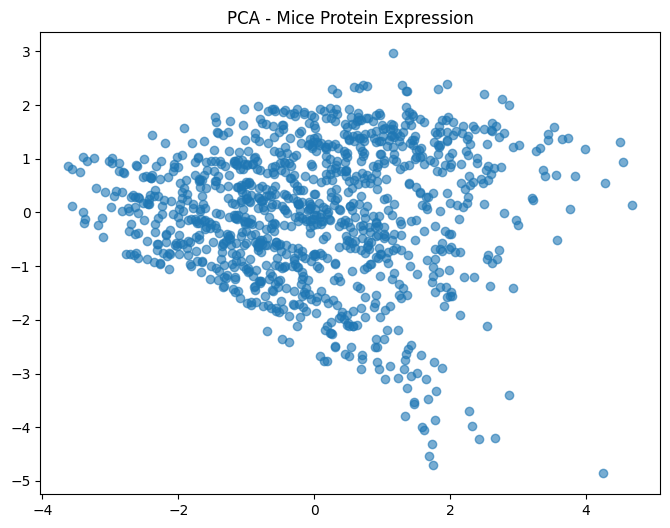

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], alpha=0.6)
plt.title('PCA - Mice Protein Expression')
plt.show()

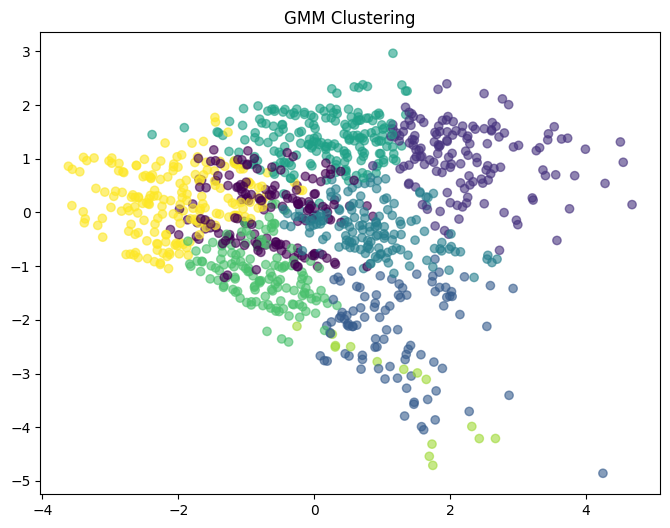

In [71]:
# GMM
gmm = GaussianMixture(n_components=8,  covariance_type="full", init_params="kmeans", random_state=42)
gmm_labels = gmm.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=gmm_labels, alpha=0.6)
plt.title('GMM Clustering')
plt.show()

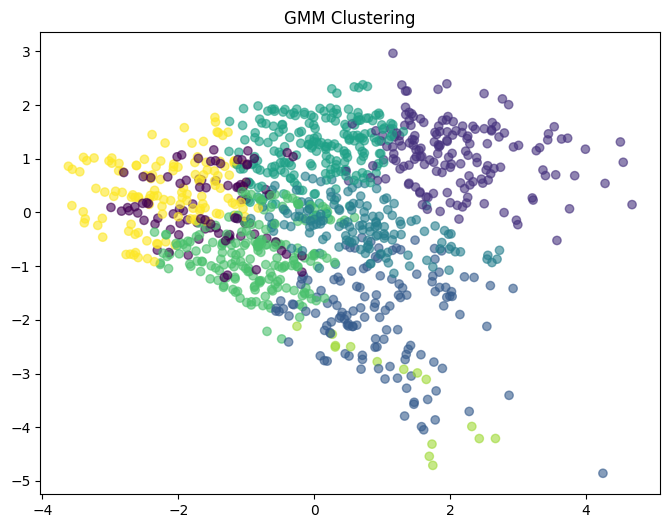

In [72]:
gmm1 = GaussianMixture(n_components=8,  covariance_type="full", init_params="k-means++", random_state=42)
gmm_labels1 = gmm1.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=gmm_labels1, alpha=0.6)
plt.title('GMM Clustering')
plt.show()

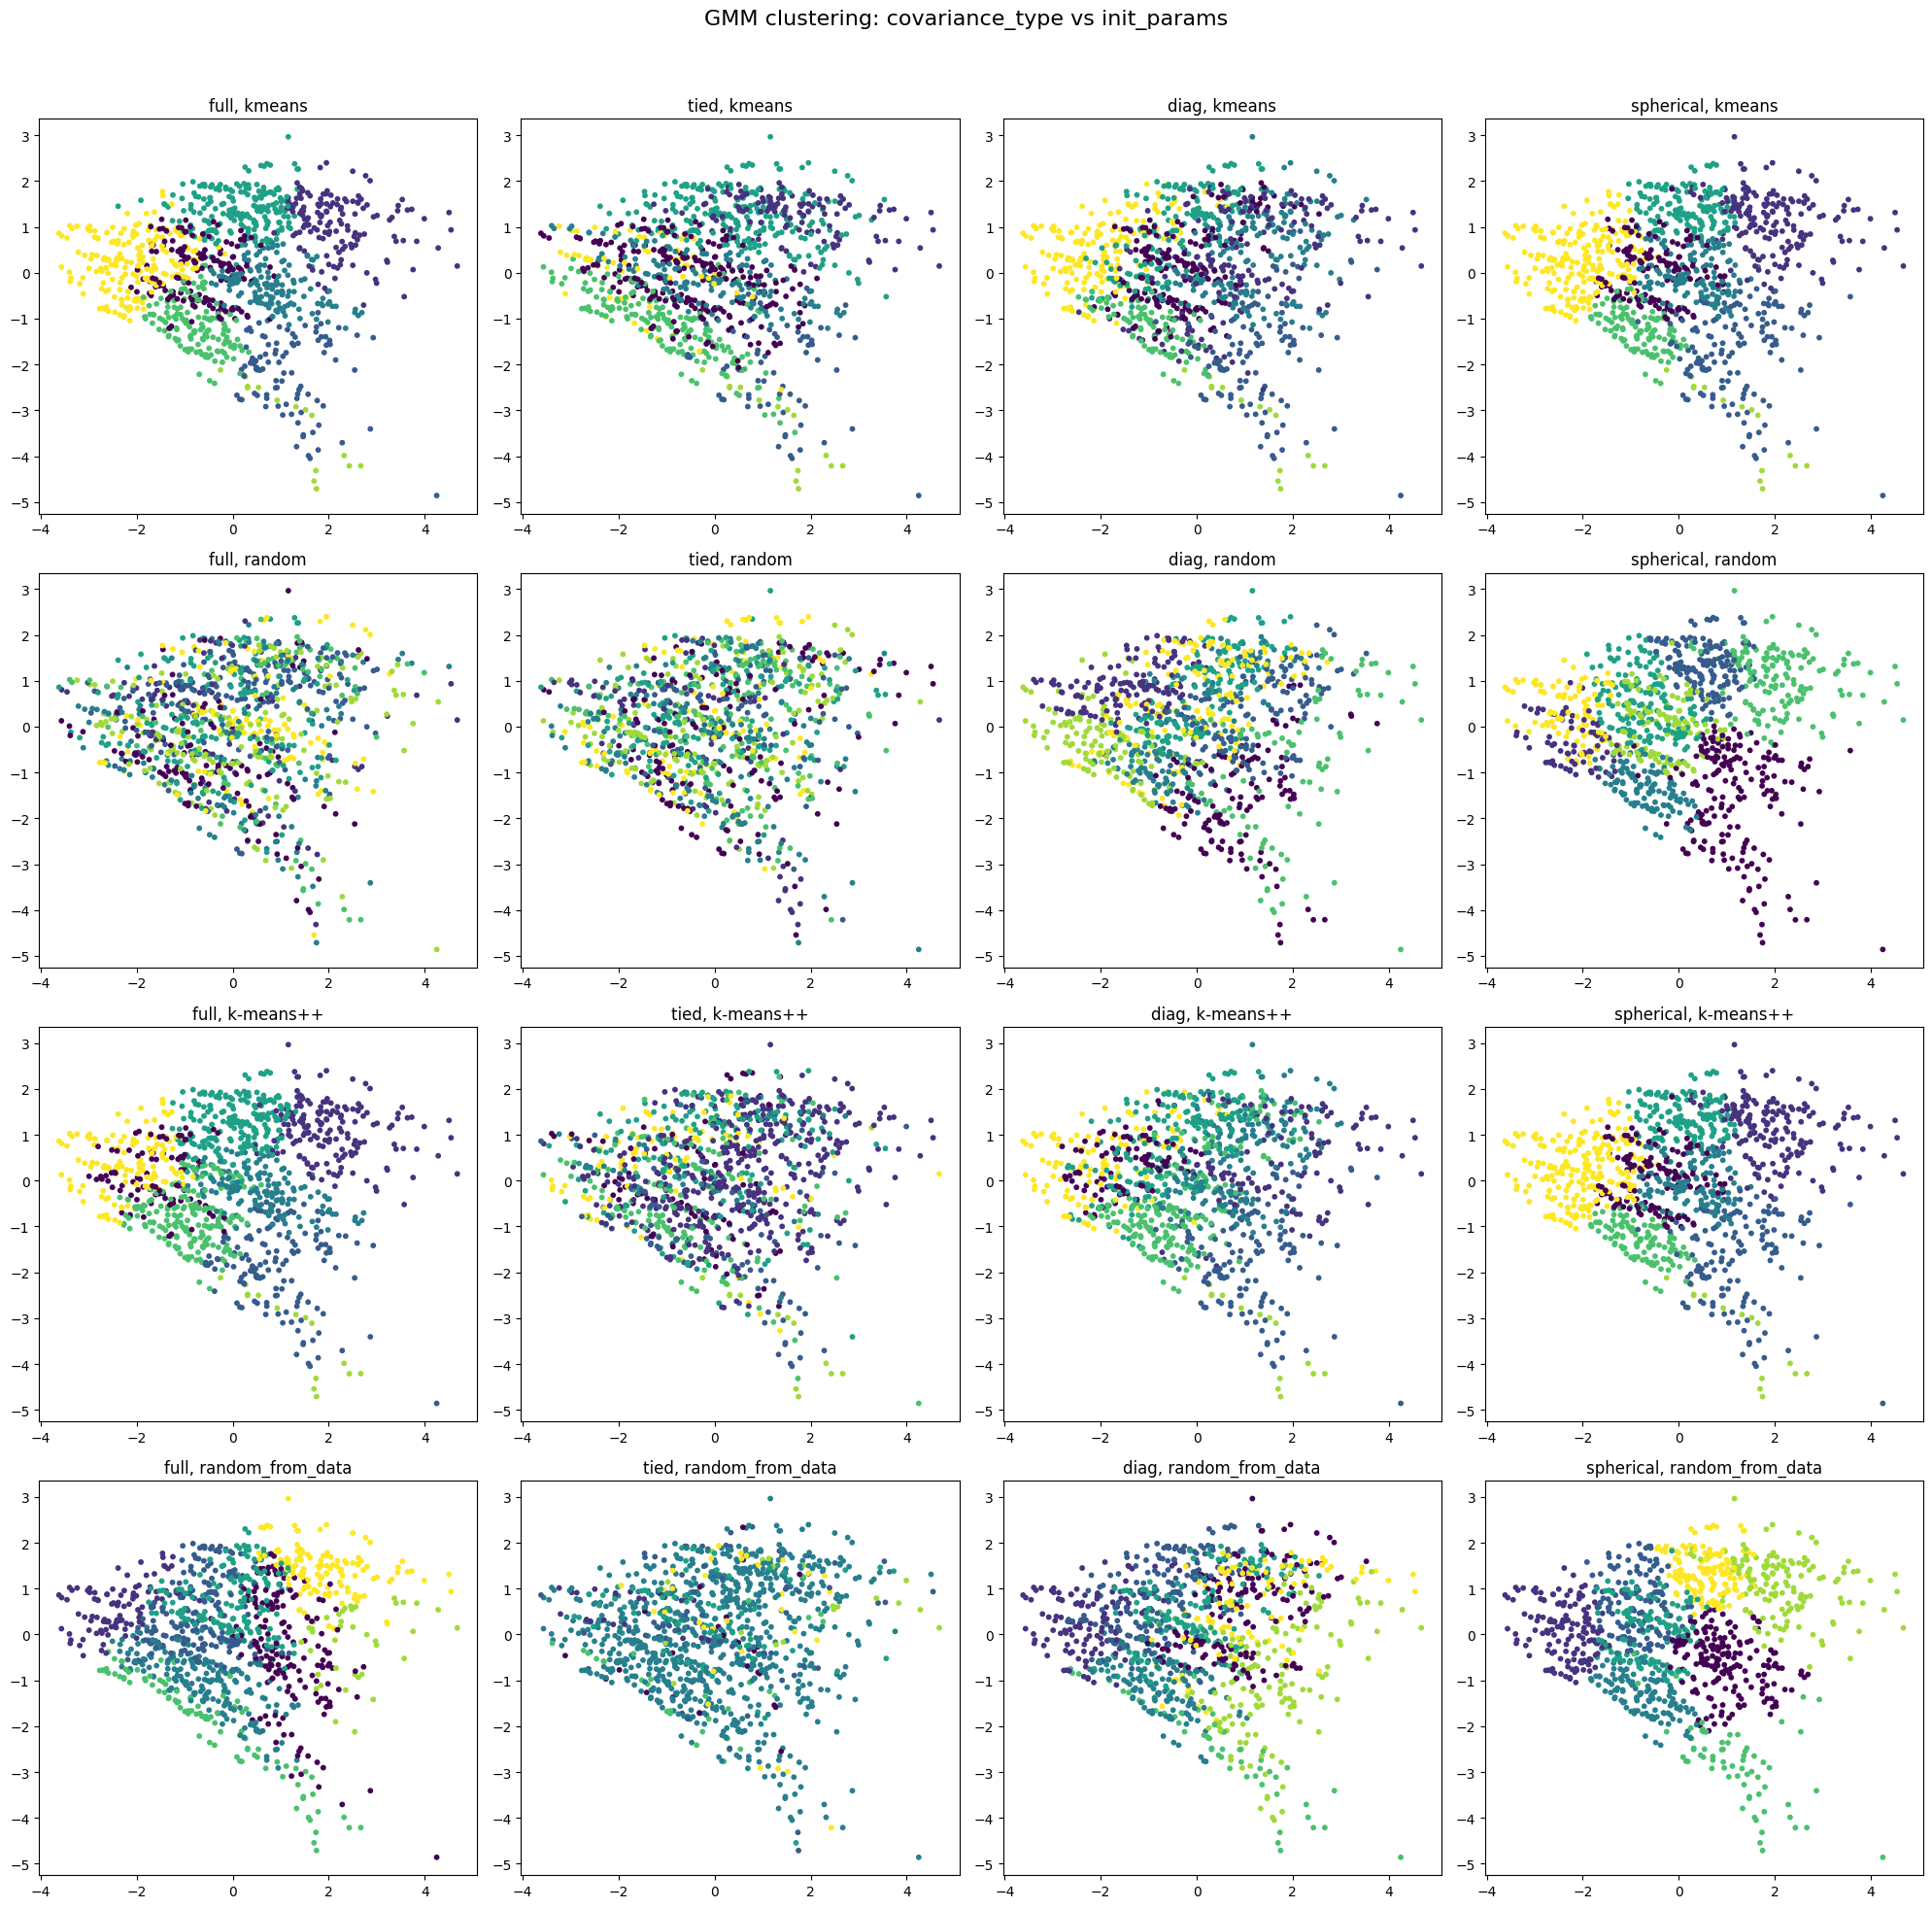

In [73]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
init_params_options = ['kmeans', 'random','k-means++', 'random_from_data']

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("GMM clustering: covariance_type vs init_params", fontsize=16)

idx = 0

for i, cov_type in enumerate(covariance_types):
    for j, init_param in enumerate(init_params_options):
        gmm = GaussianMixture(n_components=8, covariance_type=cov_type, init_params=init_param, random_state=42)
        labels = gmm.fit_predict(df_filled)
        #gmm_labels = gmm.fit_predict(result)

        ax = axs[j, i]
        scatter = ax.scatter(result[:, 0], result[:, 1], c=labels, s=10)
        ax.set_title(f'{cov_type}, {init_param}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

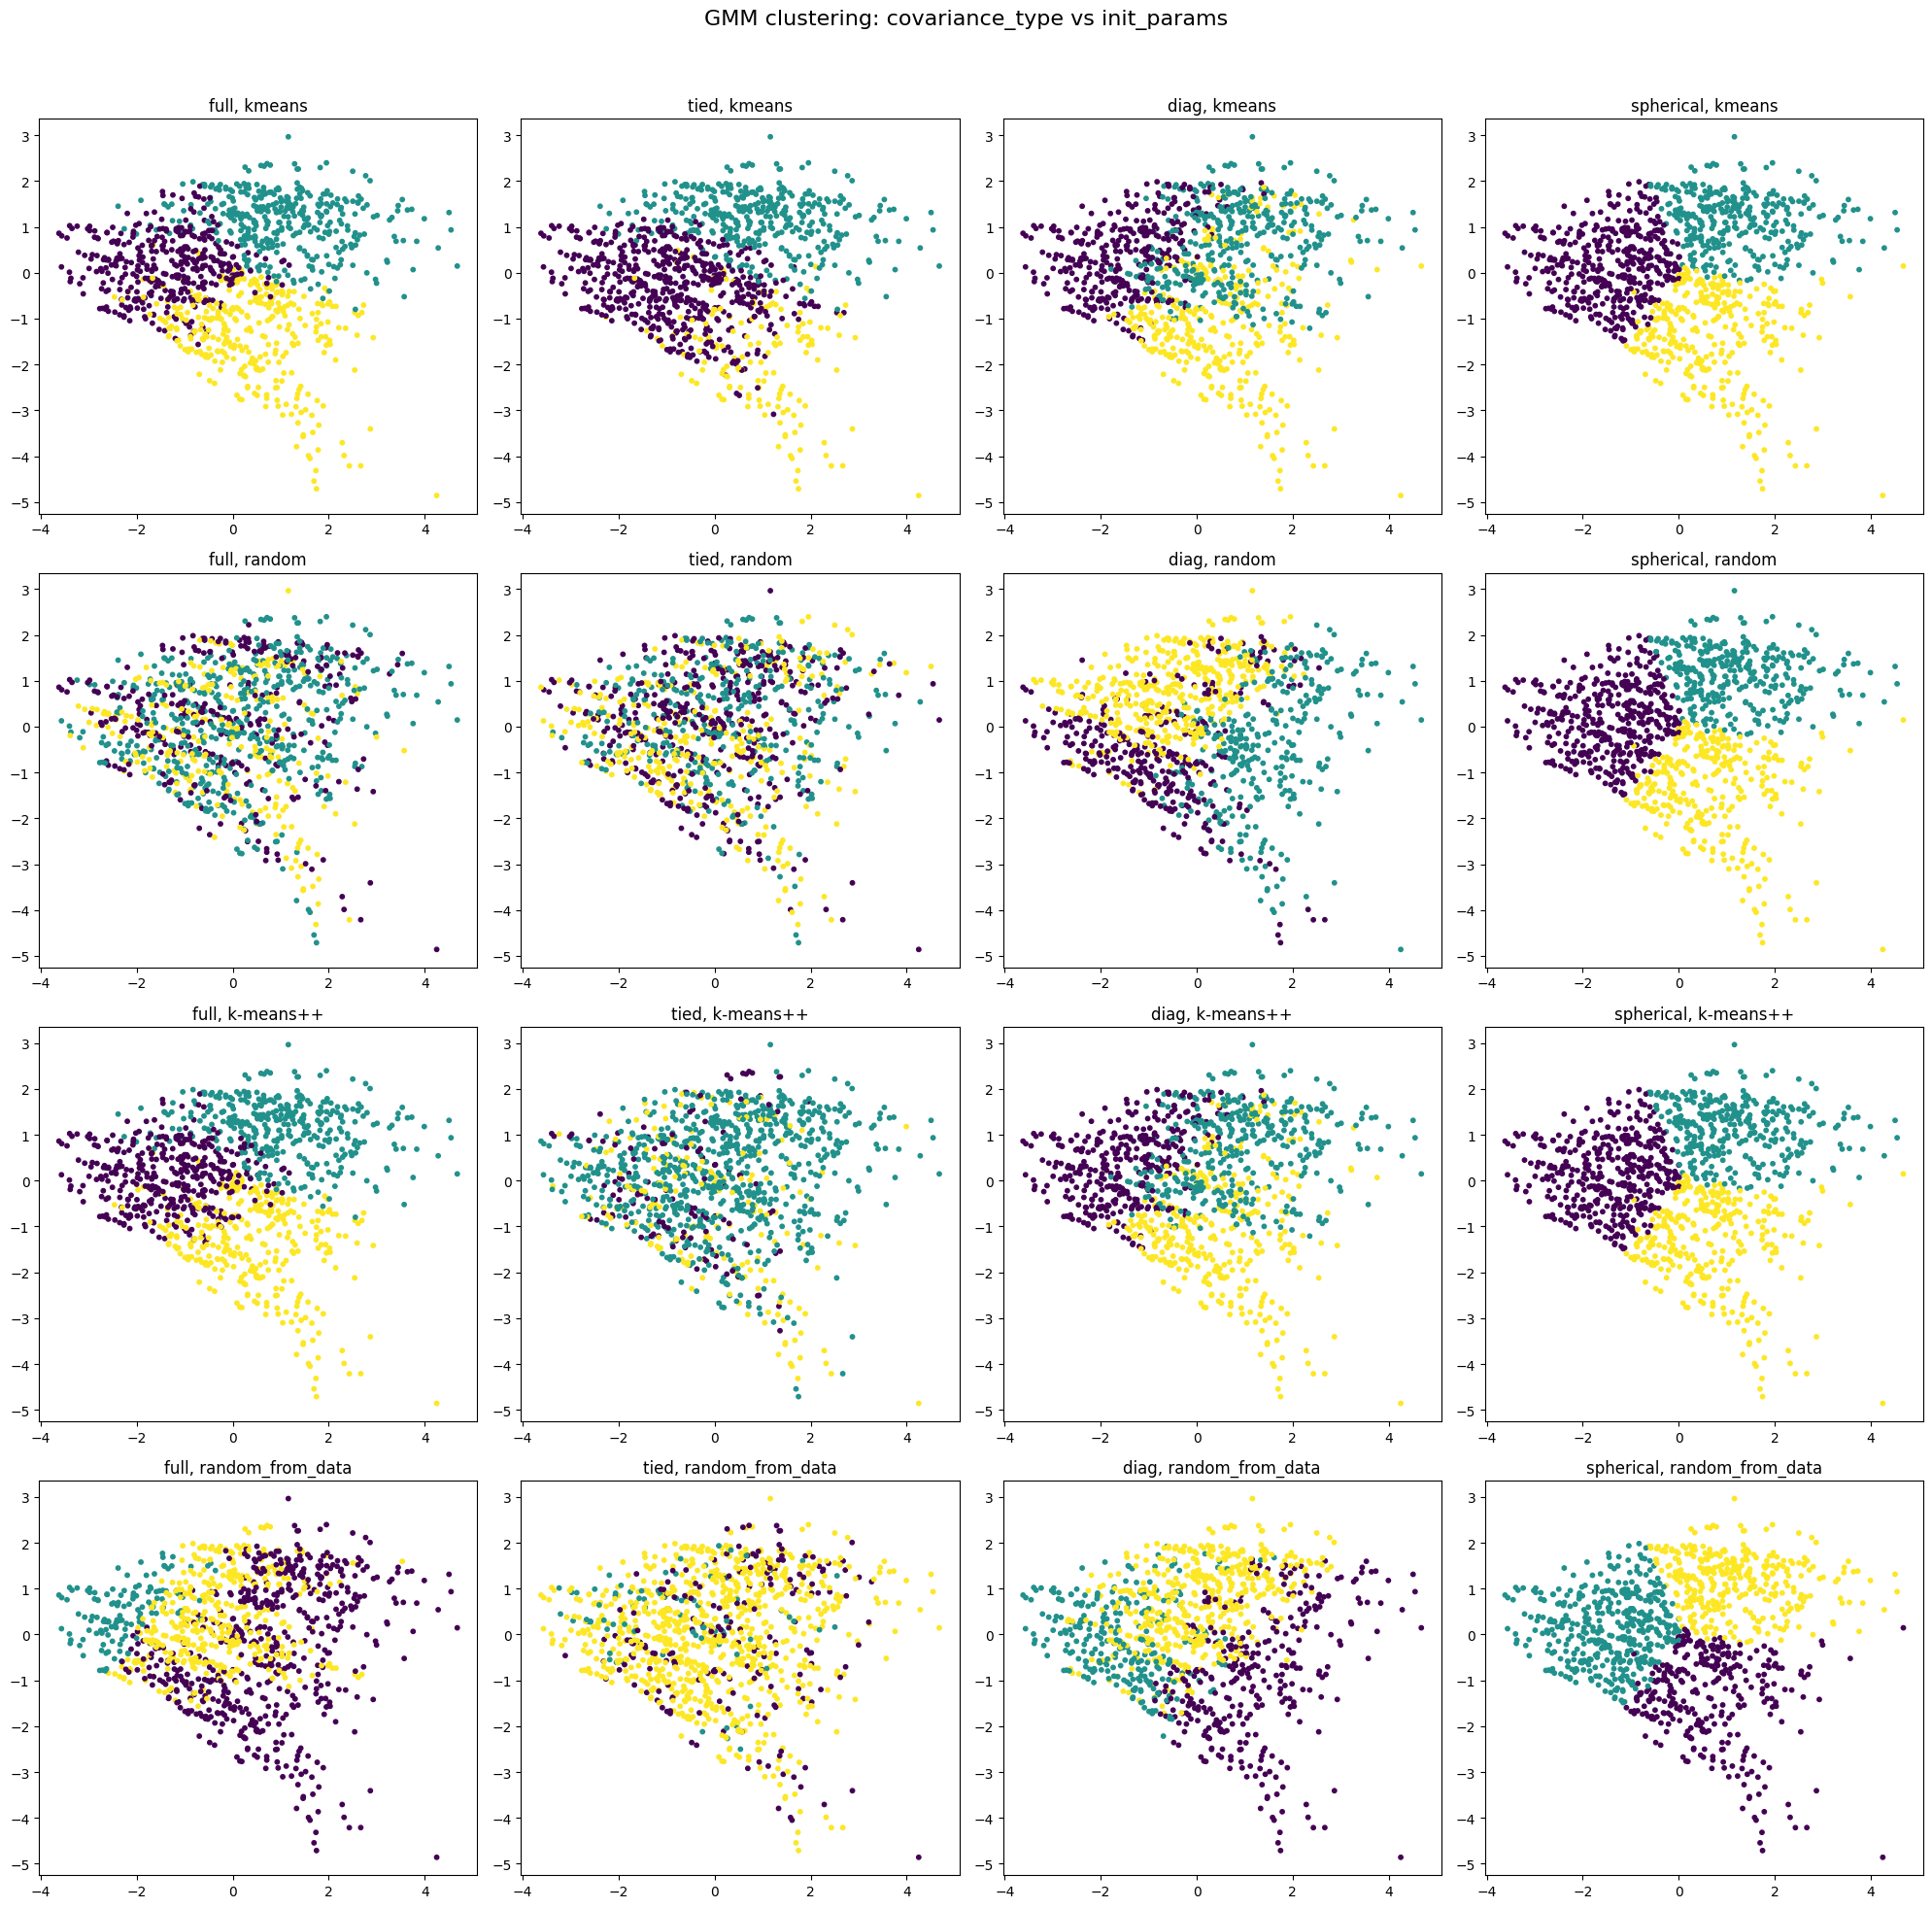

In [74]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
init_params_options = ['kmeans', 'random','k-means++', 'random_from_data']

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("GMM clustering: covariance_type vs init_params", fontsize=16)

idx = 0

for i, cov_type in enumerate(covariance_types):
    for j, init_param in enumerate(init_params_options):
        gmm = GaussianMixture(n_components=3, covariance_type=cov_type, init_params=init_param, random_state=42)
        labels = gmm.fit_predict(df_filled)
        #gmm_labels = gmm.fit_predict(result)

        ax = axs[j, i]
        scatter = ax.scatter(result[:, 0], result[:, 1], c=labels, s=10)
        ax.set_title(f'{cov_type}, {init_param}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

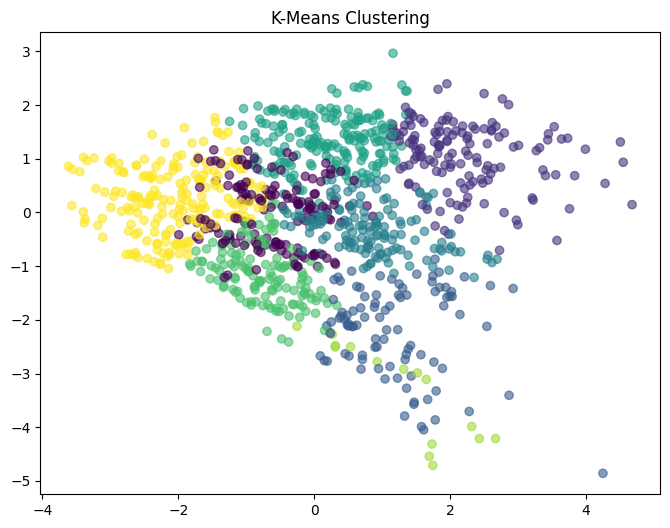

In [75]:
# K-means
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.show()

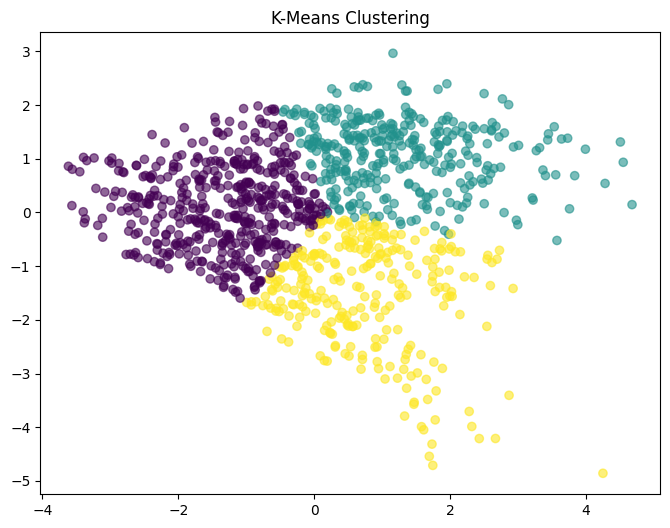

In [76]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.show()

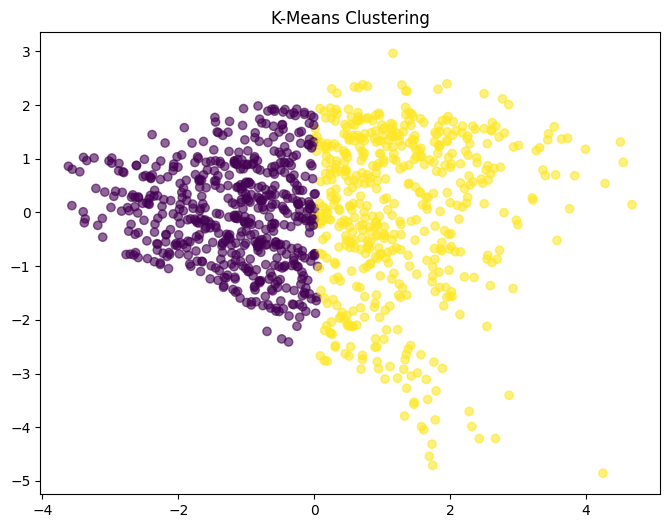

In [77]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.show()

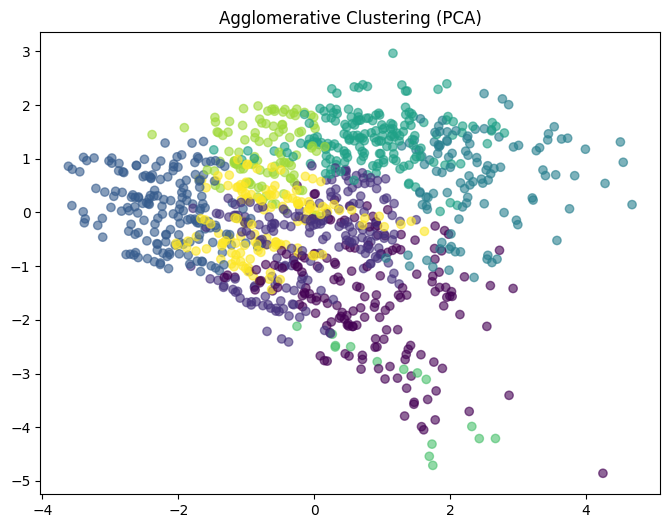

In [78]:
# Hierarchical Clustering

agg = AgglomerativeClustering(n_clusters=8)
agg_labels = agg.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=agg_labels, alpha=0.6)
plt.title('Agglomerative Clustering (PCA)')
plt.show()

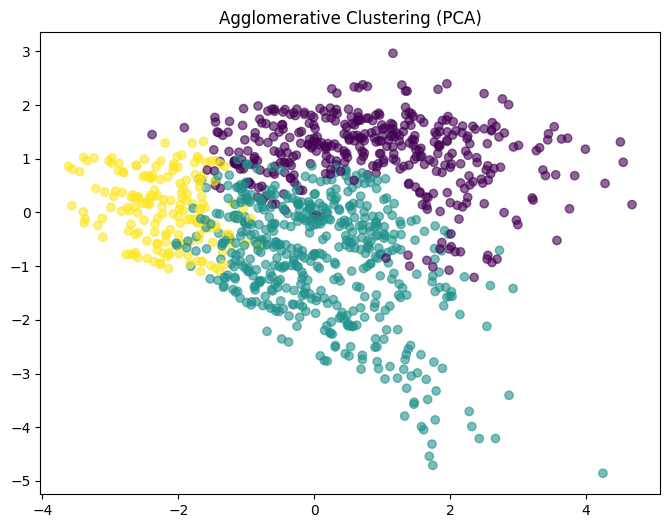

In [79]:
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=agg_labels, alpha=0.6)
plt.title('Agglomerative Clustering (PCA)')
plt.show()

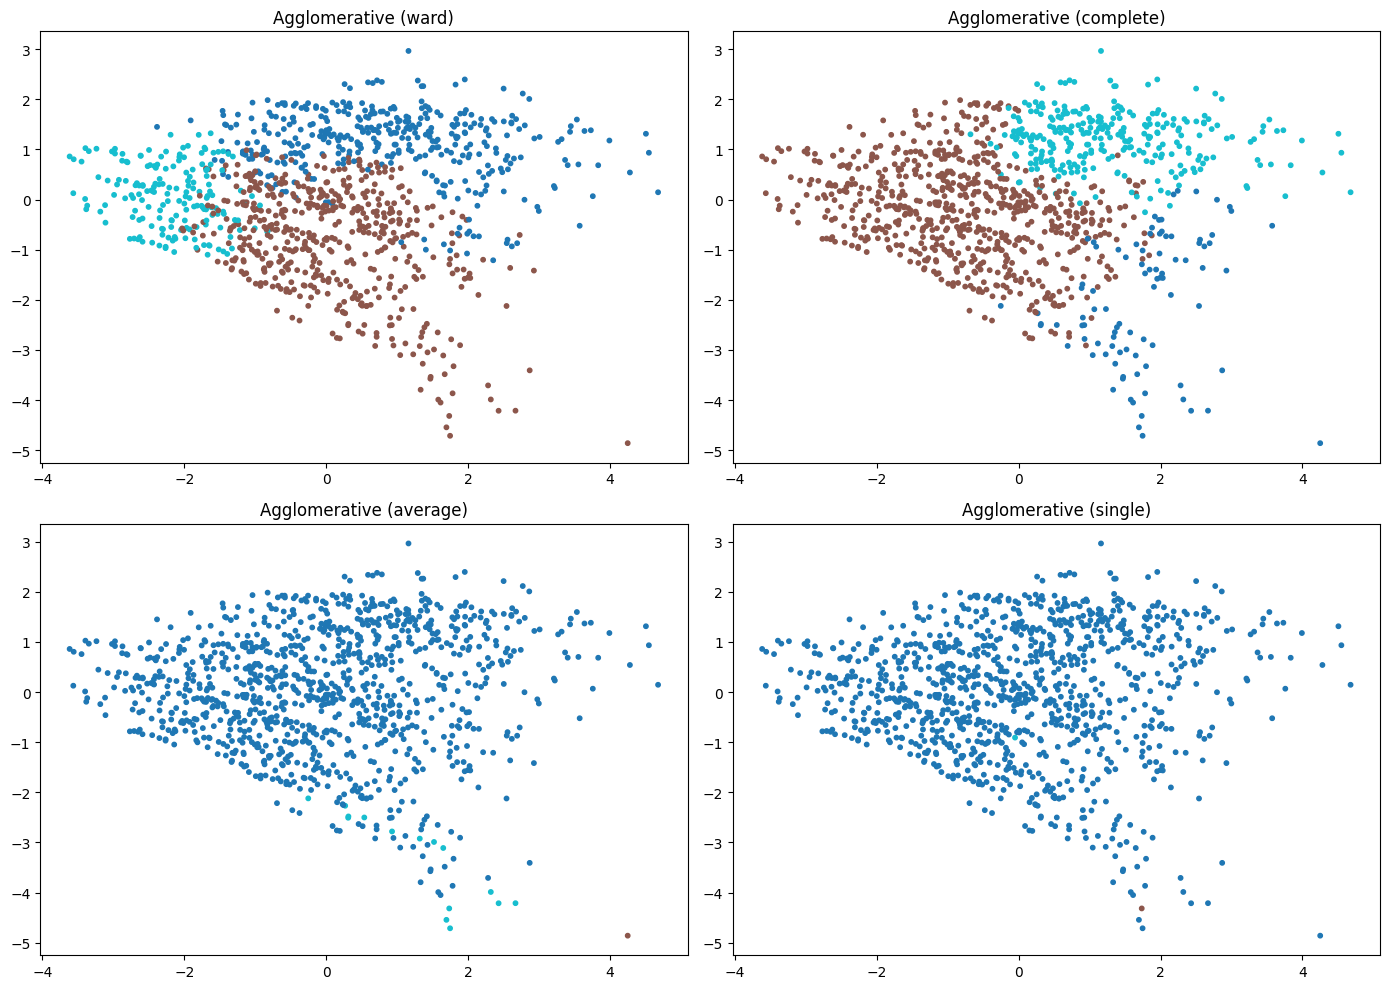

In [80]:
linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, linkage in enumerate(linkage_methods):
    try:
        model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
        labels = model.fit_predict(df_filled)

        ax = axs[idx]
        scatter = ax.scatter(result[:, 0], result[:, 1], c=labels, cmap='tab10', s=10)
        ax.set_title(f'Agglomerative ({linkage})')
    except Exception as e:
        print(f"Error with linkage='{linkage}': {e}")

plt.tight_layout()
plt.show()

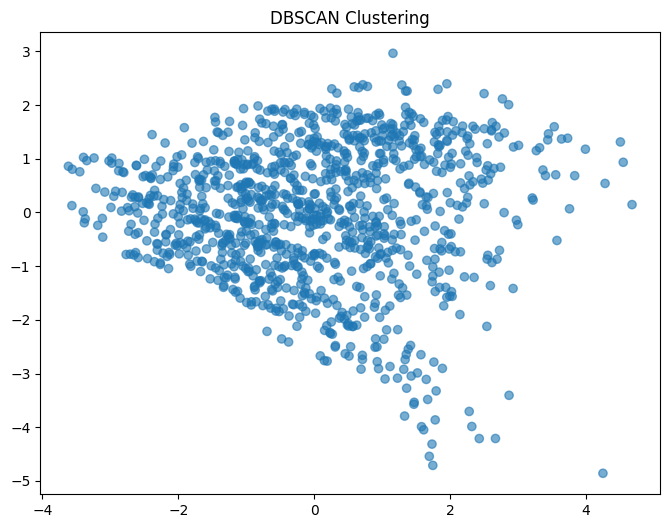

In [81]:
# DBSCAN

dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=dbscan_labels, cmap='tab20', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.show()

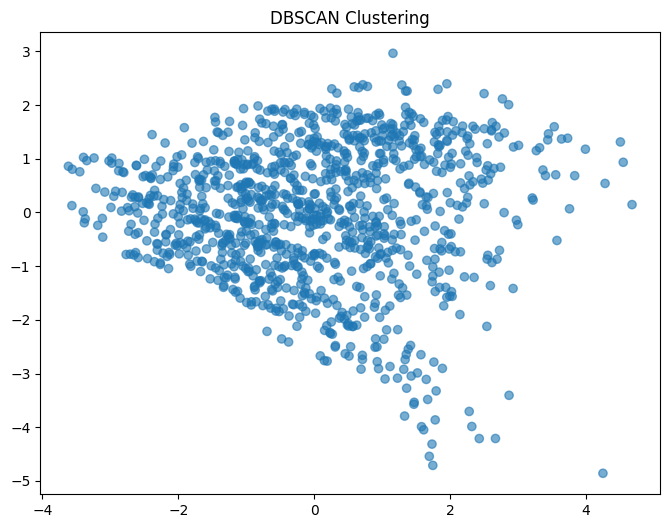

In [82]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_filled)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], c=dbscan_labels, cmap='tab20', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.show()

Without Nan - df_nulled:

In [83]:
# so 3 dimenzii
pca = PCA(n_components=3, random_state=42)
pca.fit(df_nulled)

PCA(n_components=3, random_state=42)

In [84]:
pca_result = pca.transform(df_nulled)
pca_result.shape

(552, 3)

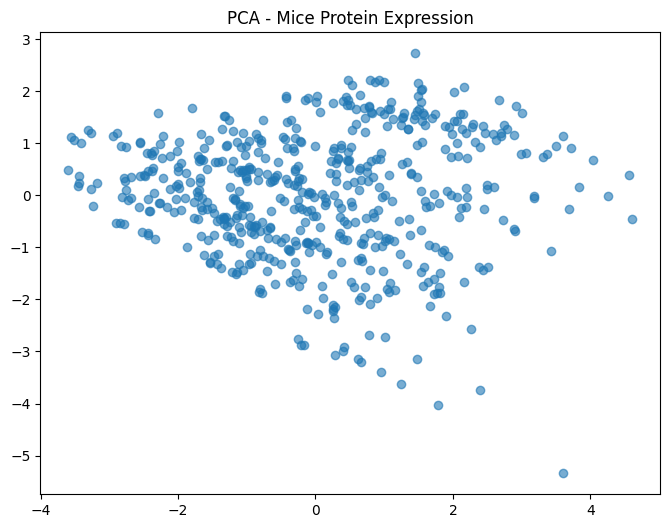

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6)
plt.title('PCA - Mice Protein Expression')
plt.show()